In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [122]:
import openpyxl
import xlwings as xw


In [123]:
df_uni = pd.read_excel('Summary_of_University.xlsx', 'Data') 
df_uni.head()

Period Province  Entrants_Total  Entrants_Female  Graduates_Total  \
0    2017    Seoul           83395            46714            82952   
1    2017    Busan           32459            15962            32516   
2    2017    Daegu           10200             4996            10718   
3    2017  Incheon            6800             2823             7218   
4    2017  Gwangju           14412             7699            14154   

   Graduates_Female  
0             45065  
1             16139  
2              5168  
3              2992  
4              8084

In [124]:
 # Prints descriptive statistics
df_uni.describe() 

Period  Entrants_Total  Entrants_Female  Graduates_Total  \
count    85.000000       85.000000        85.000000        85.000000   
mean   2019.000000    20013.764706      9821.788235     19204.952941   
std       1.422607    19158.048255     10733.555914     18588.999944   
min    2017.000000     2398.000000      1180.000000      2223.000000   
25%    2018.000000     8621.000000      3445.000000      7378.000000   
50%    2019.000000    14949.000000      7024.000000     14291.000000   
75%    2020.000000    26487.000000     12166.000000     24898.000000   
max    2021.000000    84771.000000     47609.000000     85641.000000   

       Graduates_Female  
count         85.000000  
mean        9628.976471  
std        10111.480810  
min         1114.000000  
25%         3591.000000  
50%         6739.000000  
75%        11900.000000  
max        47447.000000

In [125]:
# Check for missing data
df_uni.isnull().sum()

Period              0
Province            0
Entrants_Total      0
Entrants_Female     0
Graduates_Total     0
Graduates_Female    0
dtype: int64

In [126]:

df_uni['Entrants_Male']=df_uni['Entrants_Total']-df_uni['Entrants_Female']
df_uni['Graduates_Male']=df_uni['Graduates_Total']-df_uni['Graduates_Female']
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Period            85 non-null     int64 
 1   Province          85 non-null     object
 2   Entrants_Total    85 non-null     int64 
 3   Entrants_Female   85 non-null     int64 
 4   Graduates_Total   85 non-null     int64 
 5   Graduates_Female  85 non-null     int64 
 6   Entrants_Male     85 non-null     int64 
 7   Graduates_Male    85 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 5.4+ KB


In [127]:
# Find the data types of columns
df_uni.dtypes

Period               int64
Province            object
Entrants_Total       int64
Entrants_Female      int64
Graduates_Total      int64
Graduates_Female     int64
Entrants_Male        int64
Graduates_Male       int64
dtype: object

In [128]:
# create pivot table 
table1=pd.pivot_table(data=df_uni, index=['Period'], values=['Entrants_Female', 'Graduates_Female','Entrants_Male', 'Graduates_Male', 'Entrants_Total', 'Graduates_Total'], 
                      aggfunc=np.sum)
table1

Entrants_Female  Entrants_Male  Entrants_Total  Graduates_Female  \
Period                                                                     
2017             168948         174128          343076            168754   
2018             170002         172839          342841            161955   
2019             168499         174749          343248            161351   
2020             167792         174907          342699            162510   
2021             159611         169695          329306            163893   

        Graduates_Male  Graduates_Total  
Period                                   
2017            166613           335367  
2018            161780           323735  
2019            162532           323883  
2020            161494           324004  
2021            161539           325432

In [129]:
table2=table1.drop(labels=['Entrants_Total', 'Graduates_Total'], axis=1)

Entrants_Female  Entrants_Male  Graduates_Female  Graduates_Male
Period                                                                  
2017             168948         174128            168754          166613
2018             170002         172839            161955          161780
2019             168499         174749            161351          162532
2020             167792         174907            162510          161494
2021             159611         169695            163893          161539

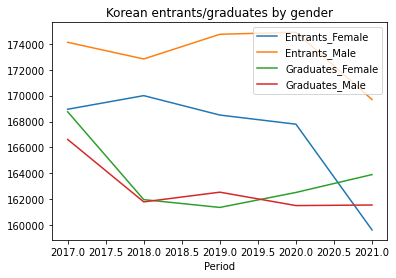

In [130]:

table2.plot(kind="line", title= "Korean entrants/graduates by gender")
table2
             

In [131]:
# Create new columns of percentages for number by sex
table1['Female Entrants%'] = (table1['Entrants_Female']/table1['Entrants_Total']*100).round(2)
table1['Female Graduates%'] = (table1['Graduates_Female']/table1['Graduates_Total']*100).round(2)
table1


Entrants_Female  Entrants_Male  Entrants_Total  Graduates_Female  \
Period                                                                     
2017             168948         174128          343076            168754   
2018             170002         172839          342841            161955   
2019             168499         174749          343248            161351   
2020             167792         174907          342699            162510   
2021             159611         169695          329306            163893   

        Graduates_Male  Graduates_Total  Female Entrants%  Female Graduates%  
Period                                                                        
2017            166613           335367             49.25              50.32  
2018            161780           323735             49.59              50.03  
2019            162532           323883             49.09              49.82  
2020            161494           324004             48.96              50.16  
2021            161539           325432             48.47              50.36

In [132]:
table1.to_csv('Summary_of_University_1.csv')

Female Entrants%  Female Graduates%
Period                                     
2017               49.25              50.32
2018               49.59              50.03
2019               49.09              49.82
2020               48.96              50.16
2021               48.47              50.36

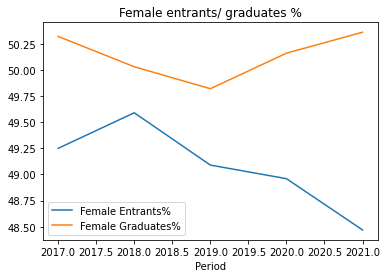

In [133]:
# plot female %
subset = table1.iloc[:,[6,7]]
subset.plot(kind="line", title= "Female entrants/ graduates %")
subset

## Korea number of enrollments by year data (2017~2020)

In [134]:
# unmerge cells and create file
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
from openpyxl.utils.cell import range_boundaries

wb = load_workbook(filename = 'Korea_2017_Number of Enrollments by field.xlsx')

for st_name in wb.sheetnames:
    st = wb[st_name]
    mcr_coord_list = [mcr.coord for mcr in st.merged_cells.ranges]
    
    for mcr in mcr_coord_list:
        min_col, min_row, max_col, max_row = range_boundaries(mcr)
        top_left_cell_value = st.cell(row=min_row, column=min_col).value
        st.unmerge_cells(mcr)
        for row in st.iter_rows(min_col=min_col, min_row=min_row, max_col=max_col, max_row=max_row):
            for cell in row:
                cell.value = top_left_cell_value

wb.save('Korea_2017_Number of Enrollments_1.xlsx')

In [135]:
# unmerge cells and create file
wb = load_workbook(filename = 'Korea_2018_Number of Enrollments by field.xlsx')

for st_name in wb.sheetnames:
    st = wb[st_name]
    mcr_coord_list = [mcr.coord for mcr in st.merged_cells.ranges]
    
    for mcr in mcr_coord_list:
        min_col, min_row, max_col, max_row = range_boundaries(mcr)
        top_left_cell_value = st.cell(row=min_row, column=min_col).value
        st.unmerge_cells(mcr)
        for row in st.iter_rows(min_col=min_col, min_row=min_row, max_col=max_col, max_row=max_row):
            for cell in row:
                cell.value = top_left_cell_value

wb.save('Korea_2018_Number of Enrollments_1.xlsx')

C:\Users\Kristina\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [136]:
# unmerge cells and create file
wb = load_workbook(filename = 'Korea_2019_Number of Enrollments by field.xlsx')

for st_name in wb.sheetnames:
    st = wb[st_name]
    mcr_coord_list = [mcr.coord for mcr in st.merged_cells.ranges]
    
    for mcr in mcr_coord_list:
        min_col, min_row, max_col, max_row = range_boundaries(mcr)
        top_left_cell_value = st.cell(row=min_row, column=min_col).value
        st.unmerge_cells(mcr)
        for row in st.iter_rows(min_col=min_col, min_row=min_row, max_col=max_col, max_row=max_row):
            for cell in row:
                cell.value = top_left_cell_value

wb.save('Korea_2019_Number of Enrollments_1.xlsx')

In [137]:
# unmerge cells and create file
wb = load_workbook(filename = 'Korea_2020_Number of Enrollments by field.xlsx')

for st_name in wb.sheetnames:
    st = wb[st_name]
    mcr_coord_list = [mcr.coord for mcr in st.merged_cells.ranges]
    
    for mcr in mcr_coord_list:
        min_col, min_row, max_col, max_row = range_boundaries(mcr)
        top_left_cell_value = st.cell(row=min_row, column=min_col).value
        st.unmerge_cells(mcr)
        for row in st.iter_rows(min_col=min_col, min_row=min_row, max_col=max_col, max_row=max_row):
            for cell in row:
                cell.value = top_left_cell_value

wb.save('Korea_2020_Number of Enrollments_1.xlsx')

In [138]:
# Check for number of variables in each column
df= pd.read_excel('Korea_2017_Number of Enrollments_1.xlsx' ) 


In [139]:
# number of unique columns
df.nunique()

Broad Field                       18
Narrow Field                      38
Detailed Field                   123
Total                            155
Total.1                          154
University of Education           14
University of Education.1         14
Universities                     155
Universities.1                   153
Air & Corr. University            39
Air & Corr. University.1          39
Industrial University             99
Industrial University.1           78
Technical College                  5
Technical College.1                5
Miscellaneous School              30
Miscellaneous School.1            27
Distance & Cyber university       82
Distance & Cyber university.1     81
College in the Company             9
College in the Company.1           9
dtype: int64

In [140]:
# unique rows
df['Broad Field'].unique()


array(['Broad Field', 'Total', 'Humanities', 'Social Sciences',
       'Education', 'Engineering', 'Natural Sciences',
       'Medical Sciences & Pharmacy', 'Arts & Physical Education', nan,
       'Unit', 'Person', '통계 도움말', '1. 조사기준일: 해당 연도 4월 1일',
       '2. 출처: 한국교육개발원 교육통계서비스(https://kess.kedi.re.kr)',
       '3. 학과의 계열 구분은 「학과(전공)분류자료집(한국교육개발원)」에 따르며, 교육통계서비스 홈페이지 "알림·서비스"메뉴의 "자료실"에서 다운로드 가능함',
       '4. 대학 과정 고등교육기관 학제 기준임',
       '* 대학 과정 고등교육기관 학제는 일반대학, 교육대학, 방송통신대학, 산업대학, 기술대학, 각종학교(대학과정), 사이버대학(대학과정), 원격대학형태의 평생교육시설(대학과정), 사내대학형태의 평생교육시설(대학과정)에 해당함.',
       '5. ‘원격대학형태의 평생교육시설’은 ‘원격대학’으로 ‘사내대학형태의 평생교육시설’은 사내대학으로 축약하여 표기함'],
      dtype=object)

In [141]:
from openpyxl import Workbook
wb = load_workbook(filename = 'Korea_2017_Number of Enrollments_1.xlsx')

In [142]:
#create a workbook and grab active worksheet
workbook= Workbook()
worksheet=workbook.active
workbook.close()

In [143]:
# read excel
df = pd.read_excel('Korea_2017_Number of Enrollments_1.xlsx') 
df

Broad Field  \
0                                          Broad Field   
1                                                Total   
2                                           Humanities   
3                                           Humanities   
4                                           Humanities   
..                                                 ...   
172    2. 출처: 한국교육개발원 교육통계서비스(https://kess.kedi.re.kr)   
173  3. 학과의 계열 구분은 「학과(전공)분류자료집(한국교육개발원)」에 따르며, 교육통...   
174                             4. 대학 과정 고등교육기관 학제 기준임   
175  * 대학 과정 고등교육기관 학제는 일반대학, 교육대학, 방송통신대학, 산업대학, 기...   
176  5. ‘원격대학형태의 평생교육시설’은 ‘원격대학’으로 ‘사내대학형태의 평생교육시설’...   

                Narrow Field  Detailed Field     Total  Total.1  \
0               Narrow Field  Detailed Field  SubtotaI   Female   
1                      Total           Total   2384090  1045562   
2                   SubtotaI        SubtotaI    329823   193138   
3    Language and Literature        SubtotaI    198099   123251   
4    Language and Literature     Linguistics      1643      873   
..                       ...             ...       ...      ...   
172                      NaN             NaN       NaN      NaN   
173                      NaN             NaN       NaN      NaN   
174                      NaN             NaN       NaN      NaN   
175                      NaN             NaN       NaN      NaN   
176                      NaN             NaN       NaN      NaN   

    University of Education University of Education.1 Universities  \
0                  SubtotaI                    Female     SubtotaI   
1                     15839                     10988      2050619   
2                         0                         0       246666   
3                         0                         0       147168   
4                         0                         0         1643   
..                      ...                       ...          ...   
172                     NaN                       NaN          NaN   
173                     NaN                       NaN          NaN   
174                     NaN                       NaN          NaN   
175                     NaN                       NaN          NaN   
176                     NaN                       NaN          NaN   

    Universities.1 Air & Corr. University  ... Industrial University  \
0           Female               SubtotaI  ...              SubtotaI   
1           839929                 171692  ...                 25343   
2           136298                  47622  ...                  1299   
3            88167                  35374  ...                   787   
4              873                      0  ...                     0   
..             ...                    ...  ...                   ...   
172            NaN                    NaN  ...                   NaN   
173            NaN                    NaN  ...                   NaN   
174            NaN                    NaN  ...                   NaN   
175            NaN                    NaN  ...                   NaN   
176            NaN                    NaN  ...                   NaN   

    Industrial University.1 Technical College Technical College.1  \
0                    Female          SubtotaI              Female   
1                      7345                96                  33   
2                       453                 0                   0   
3                       285                 0                   0   
4                         0                 0                   0   
..                      ...               ...                 ...   
172                     NaN               NaN                 NaN   
173                     NaN               NaN                 NaN   
174                     NaN               NaN                 NaN   
175                     NaN               NaN                 NaN   
176                     NaN               NaN                 NaN   

    Mi

In [144]:
# delete rows to delete notes from row 165 (to remove notes)
data = df.drop(labels=range(165, 177), axis=0)

# check last 10 rows
data.tail(10)

Broad Field    Narrow Field            Detailed Field  \
155  Arts & Physical Education    Art and Fine            Formative Arts   
156  Arts & Physical Education  Drama & Cinema                  SubtotaI   
157  Arts & Physical Education  Drama & Cinema            Drama & Cinema   
158  Arts & Physical Education           Music                  SubtotaI   
159  Arts & Physical Education           Music                     Music   
160  Arts & Physical Education           Music  Traditional Korean Music   
161  Arts & Physical Education           Music        Instrumental Music   
162  Arts & Physical Education           Music               Vocal Music   
163  Arts & Physical Education           Music               Composition   
164  Arts & Physical Education           Music                    Others   

     Total Total.1 University of Education University of Education.1  \
155   3648    2622                       0                         0   
156  14643    7392                       0                         0   
157  14643    7392                       0                         0   
158  36515   22322                       0                         0   
159   9208    6167                       0                         0   
160   2263    1587                       0                         0   
161   8756    6362                       0                         0   
162   3256    1929                       0                         0   
163   2095    1334                       0                         0   
164  10937    4943                       0                         0   

    Universities Universities.1 Air & Corr. University  ...  \
155         3323           2378                      0  ...   
156        12415           6361                      0  ...   
157        12415           6361                      0  ...   
158        32189          20483                      0  ...   
159         8792           5848                      0  ...   
160         2263           1587                      0  ...   
161         8318           6156                      0  ...   
162         3130           1876                      0  ...   
163         2018           1293                      0  ...   
164         7668           3723                      0  ...   

    Industrial University Industrial University.1 Technical College  \
155                    60                      26                 0   
156                   985                     427                 0   
157                   985                     427                 0   
158                  1091                     400                 0   
159                     1                       0                 0   
160                     0                       0                 0   
161                     0                       0                 0   
162                     0                       0                 0   
163                     0                       0                 0   
164                  1090                     400                 0   

    Technical College.1 Miscellaneous School Miscellaneous School.1  \
155                   0                  265                    218   
156                   0                  706                    402   
157                   0                  706                    402   
158                   0                 1004                    510   
159                   0                  241                    159   
160                   0                    0                      0   
161                   0                  438                    206   
162                   0                  126                     53   
163                   0                   77                     41   
164                   0                  122                     51   

    Distance & Cyber university Distance & Cyber university.1  \
155                           0                             0   
1

In [145]:
#insert year in first col
data.insert(0,'year',2017)

In [146]:
data.head()

year  Broad Field             Narrow Field  Detailed Field     Total  \
0  2017  Broad Field             Narrow Field  Detailed Field  SubtotaI   
1  2017        Total                    Total           Total   2384090   
2  2017   Humanities                 SubtotaI        SubtotaI    329823   
3  2017   Humanities  Language and Literature        SubtotaI    198099   
4  2017   Humanities  Language and Literature     Linguistics      1643   

   Total.1 University of Education University of Education.1 Universities  \
0   Female                SubtotaI                    Female     SubtotaI   
1  1045562                   15839                     10988      2050619   
2   193138                       0                         0       246666   
3   123251                       0                         0       147168   
4      873                       0                         0         1643   

  Universities.1  ... Industrial University Industrial University.1  \
0         Female  ...              SubtotaI                  Female   
1         839929  ...                 25343                    7345   
2         136298  ...                  1299                     453   
3          88167  ...                   787                     285   
4            873  ...                     0                       0   

  Technical College Technical College.1 Miscellaneous School  \
0          SubtotaI              Female             SubtotaI   
1                96                  33                 3456   
2                 0                   0                  103   
3                 0                   0                    3   
4                 0                   0                    0   

  Miscellaneous School.1 Distance & Cyber university  \
0                 Female                    SubtotaI   
1                   2082                      116758   
2                     50                       34133   
3                      2                       14767   
4                      0                           0   

  Distance & Cyber university.1 College in the Company  \
0                        Female               SubtotaI   
1                         68175                    287   
2                         23348                      0   
3                         10132                      0   
4                             0                      0   

  College in the Company.1  
0                   Female  
1                      104  
2                        0  
3                        0  
4                        0  

[5 rows x 22 columns]

In [147]:
data.tail()



year                Broad Field Narrow Field            Detailed Field  \
160  2017  Arts & Physical Education        Music  Traditional Korean Music   
161  2017  Arts & Physical Education        Music        Instrumental Music   
162  2017  Arts & Physical Education        Music               Vocal Music   
163  2017  Arts & Physical Education        Music               Composition   
164  2017  Arts & Physical Education        Music                    Others   

     Total Total.1 University of Education University of Education.1  \
160   2263    1587                       0                         0   
161   8756    6362                       0                         0   
162   3256    1929                       0                         0   
163   2095    1334                       0                         0   
164  10937    4943                       0                         0   

    Universities Universities.1  ... Industrial University  \
160         2263           1587  ...                     0   
161         8318           6156  ...                     0   
162         3130           1876  ...                     0   
163         2018           1293  ...                     0   
164         7668           3723  ...                  1090   

    Industrial University.1 Technical College Technical College.1  \
160                       0                 0                   0   
161                       0                 0                   0   
162                       0                 0                   0   
163                       0                 0                   0   
164                     400                 0                   0   

    Miscellaneous School Miscellaneous School.1 Distance & Cyber university  \
160                    0                      0                           0   
161                  438                    206                           0   
162                  126                     53                           0   
163                   77                     41                           0   
164                  122                     51                        2057   

    Distance & Cyber university.1 College in the Company  \
160                             0                      0   
161                             0                      0   
162                             0                      0   
163                             0                      0   
164                           769                      0   

    College in the Company.1  
160                        0  
161                        0  
162                        0  
163                        0  
164                        0  

[5 rows x 22 columns]

In [148]:
data.to_csv('Korea_2017_Number of Enrollments_1.csv')

In [149]:
# for 2018 files (delete notes, insert year)
df = pd.read_excel('Korea_2018_Number of Enrollments_1.xlsx') 
data = df.drop(labels=range(165, 177), axis=0)
data.insert(0,'year',2018)
data.to_csv('Korea_2018_Number of Enrollments_1.csv')

In [150]:
# for 2019 files (delete notes, insert year)
df = pd.read_excel('Korea_2019_Number of Enrollments_1.xlsx') 
data = df.drop(labels=range(165, 180), axis=0)
data.insert(0,'year',2019)
data.to_csv('Korea_2019_Number of Enrollments_1.csv')

In [151]:
# for 2020 files (delete notes, insert year)
df = pd.read_excel('Korea_2020_Number of Enrollments_1.xlsx') 
data = df.drop(labels=range(125, 135), axis=0)
data.insert(0,'year',2020)
data.to_csv('Korea_2020_Number of Enrollments_1.csv')

In [152]:
# create a dataframe taking engineering and natural sciences as subsets
data1=pd.read_csv('Korea_2017_Number of Enrollments_1.csv')
data2=data1.loc[(data1['Broad Field']=='Engineering')|(data1['Broad Field']=='Natural Sciences') ,:]

#take only the year~ Total female (column 2~7)
data2017=data2.iloc[:,1:7]

#########2018 
# create a dataframe taking engineering and natural sciences as subsets
data3=pd.read_csv('Korea_2018_Number of Enrollments_1.csv')
data4=data3.loc[(data1['Broad Field']=='Engineering')|(data1['Broad Field']=='Natural Sciences') ,:]

#take only the year~ Total female (column 2~7)
data2018=data4.iloc[:,1:7]

#########2019
# create a dataframe taking engineering and natural sciences as subsets
data5=pd.read_csv('Korea_2019_Number of Enrollments_1.csv')
data6=data5.loc[(data1['Broad Field']=='Engineering')|(data1['Broad Field']=='Natural Sciences') ,:]

#take only the year~ Total female (column 2~7)
data2019=data6.iloc[:,1:7]


#########2020
# create a dataframe taking engineering and natural sciences as subsets
data7=pd.read_csv('Korea_2020_Number of Enrollments_1.csv')
data8=data7.loc[(data1['Broad Field']=='Engineering')|(data1['Broad Field']=='Natural Sciences') ,:]

#take only the year~ Total female (column 2~7)
data2020=data8.iloc[:,1:7]


In [153]:
data2019

year       Broad Field  \
61   2019       Engineering   
62   2019       Engineering   
63   2019       Engineering   
64   2019       Engineering   
65   2019       Engineering   
..    ...               ...   
120  2019  Natural Sciences   
121  2019  Natural Sciences   
122  2019  Natural Sciences   
123  2019  Natural Sciences   
124  2019  Natural Sciences   

                                          Narrow Field  \
61                                            SubtotaI   
62                                        Architecture   
63                                        Architecture   
64                                        Architecture   
65                                        Architecture   
..                                                 ...   
120  Mathematics and physics and astronomy and geog...   
121  Mathematics and physics and astronomy and geog...   
122  Mathematics and physics and astronomy and geog...   
123  Mathematics and physics and astronomy and geog...   
124  Mathematics and physics and astronomy and geog...   

                         Detailed Field   Total Total.1  
61                             SubtotaI  599299  118505  
62                             SubtotaI   55802   15801  
63   Architecture Equipment Engineering   22582    4363  
64                         Architecture   28322    9648  
65               Landscape Architecture    4898    1790  
..                                  ...     ...     ...  
120                          Statistics   15127    6493  
121                   Physics & Science   13204    2930  
122  Astronomy & Meteorological Studies    1794     587  
123           Earth Science & Geography    4975    1730  
124            General Natural Sciences    2540     884  

[64 rows x 6 columns]

In [154]:
#align col names>> rename specific column names for 2020 to concatenate
data2020.rename(columns = {'Broad field':'Broad Field', 'Narrow field':'Narrow Field',
                           'Detailed field':'Detailed Field','Enrollments':'Total', 'Enrollments.1':'Total.1'}, inplace = True)
data2020

year       Broad Field  \
61   2020       Engineering   
62   2020       Engineering   
63   2020       Engineering   
64   2020       Engineering   
65   2020       Engineering   
..    ...               ...   
120  2020  Natural Sciences   
121  2020  Natural Sciences   
122  2020  Natural Sciences   
123  2020  Natural Sciences   
124  2020  Natural Sciences   

                                          Narrow Field  \
61                                        Architecture   
62                                        Architecture   
63                                        Architecture   
64                                        Architecture   
65                          Civil engineering and City   
..                                                 ...   
120  Mathematics and physics and astronomy and geog...   
121  Mathematics and physics and astronomy and geog...   
122  Mathematics and physics and astronomy and geog...   
123  Mathematics and physics and astronomy and geog...   
124                                           SubtotaI   

                         Detailed Field   Total Total.1  
61   Architecture Equipment Engineering   21909    4354  
62                         Architecture   28443    9813  
63               Landscape Architecture    4792    1740  
64                             SubtotaI   55144   15907  
65       Civil Construction Engineering   29891    4304  
..                                  ...     ...     ...  
120  Astronomy & Meteorological Studies    1736     553  
121           Earth Science & Geography    4851    1735  
122            General Natural Sciences    2695    1121  
123                            SubtotaI   52148   17614  
124                            SubtotaI  248917  116201  

[64 rows x 6 columns]

In [155]:
#concatenate files 
data=[data2017,data2018,data2019,data2020]
df=pd.concat(data)


In [156]:
df

year       Broad Field  \
61   2017       Engineering   
62   2017       Engineering   
63   2017       Engineering   
64   2017       Engineering   
65   2017       Engineering   
..    ...               ...   
120  2020  Natural Sciences   
121  2020  Natural Sciences   
122  2020  Natural Sciences   
123  2020  Natural Sciences   
124  2020  Natural Sciences   

                                          Narrow Field  \
61                                            SubtotaI   
62                                        Architecture   
63                                        Architecture   
64                                        Architecture   
65                                        Architecture   
..                                                 ...   
120  Mathematics and physics and astronomy and geog...   
121  Mathematics and physics and astronomy and geog...   
122  Mathematics and physics and astronomy and geog...   
123  Mathematics and physics and astronomy and geog...   
124                                           SubtotaI   

                         Detailed Field   Total Total.1  
61                             SubtotaI  593870  108403  
62                             SubtotaI   56873   15144  
63   Architecture Equipment Engineering   23660    4168  
64                         Architecture   27913    9132  
65               Landscape Architecture    5300    1844  
..                                  ...     ...     ...  
120  Astronomy & Meteorological Studies    1736     553  
121           Earth Science & Geography    4851    1735  
122            General Natural Sciences    2695    1121  
123                            SubtotaI   52148   17614  
124                            SubtotaI  248917  116201  

[256 rows x 6 columns]

In [157]:
df.rename(columns={'Total.1': 'Female Total'}, inplace=True)
df


year       Broad Field  \
61   2017       Engineering   
62   2017       Engineering   
63   2017       Engineering   
64   2017       Engineering   
65   2017       Engineering   
..    ...               ...   
120  2020  Natural Sciences   
121  2020  Natural Sciences   
122  2020  Natural Sciences   
123  2020  Natural Sciences   
124  2020  Natural Sciences   

                                          Narrow Field  \
61                                            SubtotaI   
62                                        Architecture   
63                                        Architecture   
64                                        Architecture   
65                                        Architecture   
..                                                 ...   
120  Mathematics and physics and astronomy and geog...   
121  Mathematics and physics and astronomy and geog...   
122  Mathematics and physics and astronomy and geog...   
123  Mathematics and physics and astronomy and geog...   
124                                           SubtotaI   

                         Detailed Field   Total Female Total  
61                             SubtotaI  593870       108403  
62                             SubtotaI   56873        15144  
63   Architecture Equipment Engineering   23660         4168  
64                         Architecture   27913         9132  
65               Landscape Architecture    5300         1844  
..                                  ...     ...          ...  
120  Astronomy & Meteorological Studies    1736          553  
121           Earth Science & Geography    4851         1735  
122            General Natural Sciences    2695         1121  
123                            SubtotaI   52148        17614  
124                            SubtotaI  248917       116201  

[256 rows x 6 columns]

In [158]:
df.info()

#change from object to integer
df['Total'] = df['Total'].astype('int')
df['Female Total'] = df['Female Total'].astype('int')
df['Male Total']=df['Total']-df['Female Total']
df=df.reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 61 to 124
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            256 non-null    int64 
 1   Broad Field     256 non-null    object
 2   Narrow Field    256 non-null    object
 3   Detailed Field  256 non-null    object
 4   Total           256 non-null    object
 5   Female Total    256 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.0+ KB


In [159]:
# save combined file to csv
df.to_csv('Korea_STEM_2017-2020.csv')

In [160]:
# remove subtotals in rows

IndexNames=df[df['Detailed Field']=='SubtotaI'].index
df.drop(IndexNames,inplace=True)
df

year       Broad Field  \
2    2017       Engineering   
3    2017       Engineering   
4    2017       Engineering   
6    2017       Engineering   
7    2017       Engineering   
..    ...               ...   
249  2020  Natural Sciences   
250  2020  Natural Sciences   
251  2020  Natural Sciences   
252  2020  Natural Sciences   
253  2020  Natural Sciences   

                                          Narrow Field  \
2                                         Architecture   
3                                         Architecture   
4                                         Architecture   
6                           Civil engineering and City   
7                           Civil engineering and City   
..                                                 ...   
249  Mathematics and physics and astronomy and geog...   
250  Mathematics and physics and astronomy and geog...   
251  Mathematics and physics and astronomy and geog...   
252  Mathematics and physics and astronomy and geog...   
253  Mathematics and physics and astronomy and geog...   

                         Detailed Field  Total  Female Total  Male Total  
2    Architecture Equipment Engineering  23660          4168       19492  
3                          Architecture  27913          9132       18781  
4                Landscape Architecture   5300          1844        3456  
6        Civil Construction Engineering  31298          3755       27543  
7                     Urban Engineering   6411          1709        4702  
..                                  ...    ...           ...         ...  
249                          Statistics  15188          6434        8754  
250                   Physics & Science  12977          2835       10142  
251  Astronomy & Meteorological Studies   1736           553        1183  
252           Earth Science & Geography   4851          1735        3116  
253            General Natural Sciences   2695          1121        1574  

[188 rows x 7 columns]

In [161]:
# create clean csv 
df.to_csv('Korea_STEM_2017-2020_clean.csv')

## Occupation by gender (2016~2Q.2022)

In [162]:
# read excel
df_occ = pd.read_excel('Employed_persons_by_gender__industry_2016-2022.6.xlsx', 'Data') 
df_occ.head()

By gender                           By industry   2016   2017   2018   2019  \
0     Total                                 Total  26409  26725  26822  27123   
1       NaN  A, Agriculture, forestry and fishing   1273   1279   1340   1395   
2       NaN          *Mining & manufacturing(B,C)   4603   4589   4529   4444   
3       NaN               B, Mining and quarrying     19     23     19     15   
4       NaN                      C, Manufacturing   4584   4566   4510   4429   

    2020   2021  2022.01  2022.02  2022.03  2022.04  2022.05  2022.06  
0  26904  27273    26953    27402    27754    28078    28485    28478  
1   1445   1458     1246     1276     1408     1545     1669     1677  
2   4389   4380     4479     4462     4525     4531     4515     4508  
3     13     12       13       12       13       13       12        9  
4   4376   4368     4467     4450     4512     4518     4504     4498

In [163]:
# replace missing values (from previous row)
df_occ.ffill(inplace=True)
df_occ

By gender                                        By industry   2016   2017  \
0      Total                                              Total  26409  26725   
1      Total               A, Agriculture, forestry and fishing   1273   1279   
2      Total                       *Mining & manufacturing(B,C)   4603   4589   
3      Total                            B, Mining and quarrying     19     23   
4      Total                                   C, Manufacturing   4584   4566   
..       ...                                                ...    ...    ...   
76    Female         Q, Human health and social work activities   1511   1595   
77    Female    R, Arts, sports and recreation related services    182    197   
78    Female  S, Membership organizations, repair and other ...    640    626   
79    Female  T, Activities of households as employers; undi...     69     64   
80    Female  U, Activities of extraterritorial organization...      2      2   

     2018   2019   2020   2021  2022.01  2022.02  2022.03  2022.04  2022.05  \
0   26822  27123  26904  27273    26953    27402    27754    28078    28485   
1    1340   1395   1445   1458     1246     1276     1408     1545     1669   
2    4529   4444   4389   4380     4479     4462     4525     4531     4515   
3      19     15     13     12       13       12       13       13       12   
4    4510   4429   4376   4368     4467     4450     4512     4518     4504   
..    ...    ...    ...    ...      ...      ...      ...      ...      ...   
76   1660   1802   1912   2079     1971     2155     2208     2227     2250   
77    212    236    239    227      223      225      229      222      235   
78    631    626    597    554      522      532      523      526      542   
79     47     72     95     84       78       72       72       72       75   
80      3      4      6      4        3        3        1        1        1   

    2022.06  
0     28478  
1      1677  
2      4508  
3         9  
4      4498  
..      ...  
76     2274  
77      230  
78      528  
79       79  
80        1  

[81 rows x 14 columns]

In [164]:
# save updated file to csv
df_occ.to_csv('Employed_persons_by_gender__industry_2016-2022.6_clean.csv')

# OECD Data

## Wage gap, Commute time, & time dedicated to child care

In [ ]:
df_quick=xw.load(index=False)
df_quick

In [ ]:
df_time = pd.read_excel('OECD_Time_spent_travelling_to_and_from_work_v1.xlsx', 
                        sheet_name='Table LMF2.6.A',
                        header=3,
                       skipfooter=4) 



In [ ]:
# Add gender name
df_time.insert(1, 'Gender','Male')
df_time

In [ ]:
df_time.info()

In [ ]:
# insert country
df_time.insert(6, "Country", df_time.iloc[:,0], True)
df_time


In [ ]:
# change column to Female
df_time.iloc[:,7]='Female'
df_time


In [ ]:
#change column name
df_time.rename(columns={df_time.columns[0]: "Country",
                        df_time.columns[7]:"Gender", 
                        df_time.columns[8]:"All", 
                        df_time.columns[9]:"No child",
                        df_time.columns[10]:"with children under school age",
                        df_time.columns[11]:"with school-aged children"}, inplace=True)
df_time





In [ ]:
#create male dataframe
df1=df_time.iloc[:,0:6]
df1

In [ ]:
#create female dataframe
df2=df_time.iloc[:,6:12]
df2

In [139]:
# append male and female dataframe
df=df1.append(df2, ignore_index=True)
df

C:\Users\Kristina\AppData\Local\Temp\ipykernel_6044\2480622890.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2, ignore_index=True)


Country  Gender         All    No child  \
0         Austria    Male   64.713440   64.751610   
1          Canada    Male   65.916237   65.436501   
2         Finland    Male   51.819927   52.001163   
3          France    Male   72.543198   70.942802   
4           Italy    Male   65.245407   65.143303   
5           Korea    Male  100.803879  100.096718   
6          Norway    Male   61.818451   61.268169   
7           Spain    Male   61.267925   61.802376   
8   United States    Male   47.976738   46.551739   
9         Austria  Female   55.925980   55.135693   
10         Canada  Female   53.585094   55.107754   
11        Finland  Female   51.595989   53.363808   
12         France  Female   67.324043   66.209946   
13          Italy  Female   62.425739   67.161354   
14          Korea  Female   83.568405   85.139854   
15         Norway  Female   56.146370   56.745258   
16          Spain  Female   58.488918   63.010670   
17  United States  Female   41.843765   45.757935   

    with children under school age  with school-aged children  
0                        68.893166                  61.543854  
1                        73.368629                  61.236977  
2                        50.061260                  53.244740  
3                        73.794846                  74.726204  
4                        67.939560                  63.301231  
5                       100.335968                 110.001694  
6                        63.303963                  62.473560  
7                        62.120197                  58.991962  
8                        53.922028                  47.353951  
9                        51.087162                  59.210167  
10                       53.449139                  48.510071  
11                       47.071213                  48.122997  
12                       66.210907                  69.595276  
13                       49.630707                  53.430584  
14                       72.036217                  73.656166  
15                       61.036919                  51.474747  
16                       53.835121                  50.398800  
17                       33.575378                  39.111542

In [140]:
# save combined file to csv
df.to_csv('OECD_Time_spent_travelling_to_and_from_work_clean.csv')

## Women in management (data cleaning)

In [142]:
df = pd.read_excel('OECD female management.xlsx', 
                       header=6,
                       skipfooter=2) 
df


Time   Unnamed: 1  Unnamed: 2  2010  2011  2012  2013  2014  \
0              Country          NaN         NaN   NaN   NaN   NaN   NaN   NaN   
1            Australia          NaN         NaN  34.4  36.1  35.7  35.8  36.3   
2              Austria          NaN         NaN  28.9  27.5  30.1  29.3  30.3   
3              Belgium          NaN         NaN  34.1  29.9  32.4  31.4  31.7   
4               Canada          NaN         NaN  36.8  37.1  36.4  35.8  35.5   
5                Chile          NaN         NaN  23.8  23.6    24  25.0  26.9   
6           Costa Rica          NaN         NaN    30  35.2  28.7  36.8  31.9   
7       Czech Republic          NaN         NaN  27.7  25.8  26.2  27.2  27.9   
8              Denmark          NaN         NaN  21.9  27.8  28.4  26.7  26.0   
9              Estonia          NaN         NaN  36.1  35.4  31.8  33.4  32.6   
10             Finland          NaN         NaN  30.4    32  29.7  29.6  33.7   
11              France          NaN         NaN  38.5  39.3  39.3  36.0  32.7   
12             Germany          NaN         NaN  29.9  30.3  28.6  28.9  29.0   
13              Greece          NaN         NaN  30.2  23.6    26  28.8  28.3   
14             Hungary          NaN         NaN  36.5  40.4  38.9  40.8  39.8   
15             Iceland          NaN         NaN  34.3  39.8  39.9  37.6  37.2   
16             Ireland          NaN         NaN  39.1  33.8  33.2  33.3  33.7   
17              Israel          NaN         NaN  34.7  35.5  32.2  32.8  32.9   
18               Italy          NaN         NaN  32.8  25.1    26  27.0  26.6   
19               Japan          NaN         NaN  10.4  11.7  11.3  10.9  11.4   
20               Korea          NaN         NaN   9.4  10.1  11.1  11.4  11.1   
21              Latvia          NaN         NaN  42.1  45.5  45.8  43.8  44.1   
22           Lithuania          NaN         NaN  41.1  39.1  38.9  39.6  38.6   
23          Luxembourg          NaN         NaN  24.7    24    18  14.9  22.5   
24              Mexico          NaN         NaN    ..    ..    ..  35.0  35.4   
25         Netherlands          NaN         NaN  28.4  29.3  28.8  24.6  25.5   
26              Norway          NaN         NaN  34.4  31.4  32.2  32.9  35.5   
27              Poland          NaN         NaN  35.6    38  37.8  37.8  38.8   
28            Portugal          NaN         NaN  32.3  33.4  35.2  33.8  35.1   
29     Slovak Republic          NaN         NaN  34.6  30.9  33.1  32.7  30.0   
30            Slovenia          NaN         NaN  34.8  38.4    39  37.0  37.5   
31               Spain          NaN         NaN  34.3  29.9  30.2  30.8  30.9   
32              Sweden          NaN         NaN  31.4  34.5  35.5  35.4  37.1   
33         Switzerland          NaN         NaN  33.5  30.7  30.5  29.8  30.8   
34             Türkiye          NaN         NaN    10    11  12.1  14.4  13.4   
35      United Kingdom          NaN         NaN  35.7  34.6  34.4  33.9  35.3   
36       United States          NaN         NaN    ..  38.9  39.3  38.9  38.9   
37      OECD - Average          NaN         NaN  31.3  31.2    31  30.9  31.2   
38  Non-OECD Economies       Brazil         NaN    ..  36.1  37.2  37.3  37.8   
39                 NaN        India         NaN  12.2    ..  12.9   NaN   NaN   
40                 NaN    Indonesia         NaN  20.9    ..  19.3  21.6  23.5   
41                 NaN       Russia         NaN  38.6  39.5  39.1  38.4  38.1   

    2015  2016  2017  2018  2019  2020  2021  
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   37.7  36.7  38.7  37.8  39.2  40.0   NaN  
2   29.7  31.8  31.8  31.6  33.2  32.8  35.5  
3   32.6  32.7  33.5  33.9  32.7  34.5  35.4  
4   36.3   NaN  34.5  35.1  35.3  35.8  35.6  
5   27.4  27.4  26.5  27.3  29.9  27.4  30.4  
6   28.7  34.6  41.0  37.1  40.5  59.4  40.2  
7   29.5  25.4  24.6  26.8  26.8  27.8  28.4  
8   26.3  27.5  26.3  26.1  26.8  27.9  28.2  
9   31.1  36.5  38.9  36.5  37.8  37.5  41.2  
10  33.3  34.1  3

In [143]:
# drop columns(first, second)
df.drop(df.columns[1:3], axis=1, inplace=True)
df

Time  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
0              Country   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3   NaN  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6   NaN   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4    ..  13.3  12.8   NaN   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico    ..    ..    ..  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States    ..  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies    ..  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   
39                 NaN  12.2    ..  12.9   NaN   NaN   NaN   NaN   NaN  13.7   
40                 NaN  20.9    ..  19.3  21.6  23.5  22.4  44.8  27.5   NaN   
41                 NaN  38.6  39.5  39.1  38.4  38.1  38.7  42.0  41.3  41.8   

    2019  2020  2021  
0    NaN   NaN   NaN  
1   39.2  40.0   NaN  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17   NaN   NaN   NaN  
18  27.8  27.3  28.6  
19   NaN  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24

In [145]:
#drop 1st row
df1=df.drop(df.index[0])
df1=df.drop(df.index[38:41])
df1

Time  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3   NaN  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6   NaN   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4    ..  13.3  12.8   NaN   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico    ..    ..    ..  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States    ..  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies    ..  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   

    2019  2020  2021  
1   39.2  40.0   NaN  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17   NaN   NaN   NaN  
18  27.8  27.3  28.6  
19   NaN  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24  36.0  38.4  38.5  
25  27.1  26.2  26.0  
26  34.5  34.0  33.5  
27  43.1  43.3  43.0  
28  37.2  35.7  38.0  
29  33.7  35.5  37.3  
30  40.1  40.1  34.0  
31  33.2  35.0  33.3  
32  40.3  42.3  43.0  
33  33.5  33.3  31.9  
34  16.2  18.2   NaN  
35  36.8   NaN   NaN  
36  40.7  41.1  41.4  
37  34.0  34.2  33.7  
38  38.4  36.8  38.7

In [160]:
# rename column
df1.rename(columns={df1.columns[0]: "Country"}, inplace=True)
df1

Country  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3   NaN  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6   NaN   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4    ..  13.3  12.8   NaN   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico    ..    ..    ..  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States    ..  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies    ..  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   

    2019  2020  2021  
1   39.2  40.0   NaN  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17   NaN   NaN   NaN  
18  27.8  27.3  28.6  
19   NaN  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24  36.0  38.4  38.5  
25  27.1  26.2  26.0  
26  34.5  34.0  33.5  
27  43.1  43.3  43.0  
28  37.2  35.7  38.0  
29  33.7  35.5  37.3  
30  40.1  40.1  34.0  
31  33.2  35.0  33.3  
32  40.3  42.3  43.0  
33  33.5  33.3  31.9  
34  16.2  18.2   NaN  
35  36.8   NaN   NaN  
36  40.7  41.1  41.4  
37  34.0  34.2  33.7  
38  38.4  36.8  38.7

In [174]:
df1.replace("..", "NaN")

Country  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3   NaN  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6   NaN   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4   NaN  13.3  12.8   NaN   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico   NaN   NaN   NaN  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States   NaN  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies   NaN  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   

    2019  2020  2021  
1   39.2  40.0   NaN  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17   NaN   NaN   NaN  
18  27.8  27.3  28.6  
19   NaN  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24  36.0  38.4  38.5  
25  27.1  26.2  26.0  
26  34.5  34.0  33.5  
27  43.1  43.3  43.0  
28  37.2  35.7  38.0  
29  33.7  35.5  37.3  
30  40.1  40.1  34.0  
31  33.2  35.0  33.3  
32  40.3  42.3  43.0  
33  33.5  33.3  31.9  
34  16.2  18.2   NaN  
35  36.8   NaN   NaN  
36  40.7  41.1  41.4  
37  34.0  34.2  33.7  
38  38.4  36.8  38.7

In [183]:
df2=df1.ffill(axis=1)
df2

Country  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3  36.3  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6  34.6   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4    ..  13.3  12.8  12.8   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico    ..    ..    ..  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States    ..  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies    ..  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   

    2019  2020  2021  
1   39.2  40.0  40.0  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17  34.6  34.6  34.6  
18  27.8  27.3  28.6  
19  12.8  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24  36.0  38.4  38.5  
25  27.1  26.2  26.0  
26  34.5  34.0  33.5  
27  43.1  43.3  43.0  
28  37.2  35.7  38.0  
29  33.7  35.5  37.3  
30  40.1  40.1  34.0  
31  33.2  35.0  33.3  
32  40.3  42.3  43.0  
33  33.5  33.3  31.9  
34  16.2  18.2  18.2  
35  36.8  36.8  36.8  
36  40.7  41.1  41.4  
37  34.0  34.2  33.7  
38  38.4  36.8  38.7

In [184]:
df3=df2.bfill(axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  38 non-null     object 
 1   2010     38 non-null     object 
 2   2011     38 non-null     object 
 3   2012     38 non-null     object 
 4   2013     38 non-null     float64
 5   2014     38 non-null     float64
 6   2015     38 non-null     object 
 7   2016     38 non-null     float64
 8   2017     38 non-null     float64
 9   2018     38 non-null     float64
 10  2019     38 non-null     float64
 11  2020     38 non-null     float64
 12  2021     38 non-null     float64
dtypes: float64(8), object(5)
memory usage: 4.0+ KB


In [185]:
df3

Country  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
1            Australia  34.4  36.1  35.7  35.8  36.3  37.7  36.7  38.7  37.8   
2              Austria  28.9  27.5  30.1  29.3  30.3  29.7  31.8  31.8  31.6   
3              Belgium  34.1  29.9  32.4  31.4  31.7  32.6  32.7  33.5  33.9   
4               Canada  36.8  37.1  36.4  35.8  35.5  36.3  36.3  34.5  35.1   
5                Chile  23.8  23.6    24  25.0  26.9  27.4  27.4  26.5  27.3   
6           Costa Rica    30  35.2  28.7  36.8  31.9  28.7  34.6  41.0  37.1   
7       Czech Republic  27.7  25.8  26.2  27.2  27.9  29.5  25.4  24.6  26.8   
8              Denmark  21.9  27.8  28.4  26.7  26.0  26.3  27.5  26.3  26.1   
9              Estonia  36.1  35.4  31.8  33.4  32.6  31.1  36.5  38.9  36.5   
10             Finland  30.4    32  29.7  29.6  33.7  33.3  34.1  31.3  31.8   
11              France  38.5  39.3  39.3  36.0  32.7  31.8  33.1  33.4  34.4   
12             Germany  29.9  30.3  28.6  28.9  29.0  29.3  29.3  29.2  29.4   
13              Greece  30.2  23.6    26  28.8  28.3  25.7  25.5  29.8  27.5   
14             Hungary  36.5  40.4  38.9  40.8  39.8  40.5  39.4  39.4  38.6   
15             Iceland  34.3  39.8  39.9  37.6  37.2  38.2  34.2  32.4  41.5   
16             Ireland  39.1  33.8  33.2  33.3  33.7  34.6  36.2  36.2  36.0   
17              Israel  34.7  35.5  32.2  32.8  32.9  32.3  34.2  34.6  34.6   
18               Italy  32.8  25.1    26  27.0  26.6  26.6  27.7  27.5  27.0   
19               Japan  10.4  11.7  11.3  10.9  11.4    ..  13.3  12.8  12.8   
20               Korea   9.4  10.1  11.1  11.4  11.1  10.5   9.8  12.3  14.5   
21              Latvia  42.1  45.5  45.8  43.8  44.1  44.3  47.2  46.3  44.9   
22           Lithuania  41.1  39.1  38.9  39.6  38.6  39.6  39.4  39.3  39.2   
23          Luxembourg  24.7    24    18  14.9  22.5  18.2  17.7  18.8  24.5   
24              Mexico    ..    ..    ..  35.0  35.4    36  36.0  36.7  36.0   
25         Netherlands  28.4  29.3  28.8  24.6  25.5    26  25.4  26.6  25.7   
26              Norway  34.4  31.4  32.2  32.9  35.5    36  37.9  38.3  35.6   
27              Poland  35.6    38  37.8  37.8  38.8  40.2  41.2  41.2  42.5   
28            Portugal  32.3  33.4  35.2  33.8  35.1  32.6  35.9  34.3  34.0   
29     Slovak Republic  34.6  30.9  33.1  32.7  30.0  31.3  35.0  32.8  32.1   
30            Slovenia  34.8  38.4    39  37.0  37.5  37.4  40.8  41.2  38.5   
31               Spain  34.3  29.9  30.2  30.8  30.9  31.4  31.2  30.6  32.1   
32              Sweden  31.4  34.5  35.5  35.4  37.1  39.5  39.3  38.9  38.1   
33         Switzerland  33.5  30.7  30.5  29.8  30.8  32.3  32.8  30.4  31.7   
34             Türkiye    10    11  12.1  14.4  13.4  13.2  15.1  15.0  14.8   
35      United Kingdom  35.7  34.6  34.4  33.9  35.3  35.4  36.0  36.1  36.3   
36       United States    ..  38.9  39.3  38.9  38.9  39.6  39.7  40.5  40.7   
37      OECD - Average  31.3  31.2    31  30.9  31.2  31.3  32.1  32.3  33.0   
38  Non-OECD Economies    ..  36.1  37.2  37.3  37.8  38.5  39.0  39.1  38.7   

    2019  2020  2021  
1   39.2  40.0  40.0  
2   33.2  32.8  35.5  
3   32.7  34.5  35.4  
4   35.3  35.8  35.6  
5   29.9  27.4  30.4  
6   40.5  59.4  40.2  
7   26.8  27.8  28.4  
8   26.8  27.9  28.2  
9   37.8  37.5  41.2  
10  36.9  37.5  36.5  
11  34.7  35.5  37.8  
12  29.4  28.9  29.2  
13  28.0  29.4  29.6  
14  38.9  39.2  37.3  
15  41.9  38.6  37.6  
16  35.3  36.3  38.0  
17  34.6  34.6  34.6  
18  27.8  27.3  28.6  
19  12.8  13.3  13.2  
20  15.4  15.6  16.3  
21  45.8  46.9  45.9  
22  39.2  37.9  37.0  
23  25.8  26.3  21.9  
24  36.0  38.4  38.5  
25  27.1  26.2  26.0  
26  34.5  34.0  33.5  
27  43.1  43.3  43.0  
28  37.2  35.7  38.0  
29  33.7  35.5  37.3  
30  40.1  40.1  34.0  
31  33.2  35.0  33.3  
32  40.3  42.3  43.0  
33  33.5  33.3  31.9  
34  16.2  18.2  18.2  
35  36.8  36.8  36.8  
36  40.7  41.1  41.4  
37  34.0  34.2  33.7  
38  38.4  36.8  38.7

In [186]:
# save combined file to csv
df3.to_csv('OECD female management_clean.csv')

## Identifying correlations

In [230]:
# merge files
df1= pd.read_csv('OECD female management_clean.csv')
df2= pd.read_csv('OECD_Time_spent_travelling_to_and_from_work_clean.csv')
df3= pd.read_excel('OECD time dedicated for child care by gender.xlsx')


In [231]:
#choose only Country and 2021 cols in df1
df1=df1[['Country','2021']]
df1.columns = ['Country', 'Female Mgt']
df1


Country  Female Mgt
0            Australia        40.0
1              Austria        35.5
2              Belgium        35.4
3               Canada        35.6
4                Chile        30.4
5           Costa Rica        40.2
6       Czech Republic        28.4
7              Denmark        28.2
8              Estonia        41.2
9              Finland        36.5
10              France        37.8
11             Germany        29.2
12              Greece        29.6
13             Hungary        37.3
14             Iceland        37.6
15             Ireland        38.0
16              Israel        34.6
17               Italy        28.6
18               Japan        13.2
19               Korea        16.3
20              Latvia        45.9
21           Lithuania        37.0
22          Luxembourg        21.9
23              Mexico        38.5
24         Netherlands        26.0
25              Norway        33.5
26              Poland        43.0
27            Portugal        38.0
28     Slovak Republic        37.3
29            Slovenia        34.0
30               Spain        33.3
31              Sweden        43.0
32         Switzerland        31.9
33             Türkiye        18.2
34      United Kingdom        36.8
35       United States        41.4
36      OECD - Average        33.7
37  Non-OECD Economies        38.7

In [232]:
# rename column
df1.rename(columns={df1.columns[1]: "Female Mgt"}, inplace=True)
df1

Country  Female Mgt
0            Australia        40.0
1              Austria        35.5
2              Belgium        35.4
3               Canada        35.6
4                Chile        30.4
5           Costa Rica        40.2
6       Czech Republic        28.4
7              Denmark        28.2
8              Estonia        41.2
9              Finland        36.5
10              France        37.8
11             Germany        29.2
12              Greece        29.6
13             Hungary        37.3
14             Iceland        37.6
15             Ireland        38.0
16              Israel        34.6
17               Italy        28.6
18               Japan        13.2
19               Korea        16.3
20              Latvia        45.9
21           Lithuania        37.0
22          Luxembourg        21.9
23              Mexico        38.5
24         Netherlands        26.0
25              Norway        33.5
26              Poland        43.0
27            Portugal        38.0
28     Slovak Republic        37.3
29            Slovenia        34.0
30               Spain        33.3
31              Sweden        43.0
32         Switzerland        31.9
33             Türkiye        18.2
34      United Kingdom        36.8
35       United States        41.4
36      OECD - Average        33.7
37  Non-OECD Economies        38.7

In [233]:
df2

Unnamed: 0        Country  Gender         All    No child  \
0            0        Austria    Male   64.713440   64.751610   
1            1         Canada    Male   65.916237   65.436501   
2            2        Finland    Male   51.819927   52.001163   
3            3         France    Male   72.543198   70.942802   
4            4          Italy    Male   65.245407   65.143303   
5            5          Korea    Male  100.803879  100.096718   
6            6         Norway    Male   61.818451   61.268169   
7            7          Spain    Male   61.267925   61.802376   
8            8  United States    Male   47.976738   46.551739   
9            9        Austria  Female   55.925980   55.135693   
10          10         Canada  Female   53.585094   55.107754   
11          11        Finland  Female   51.595989   53.363808   
12          12         France  Female   67.324043   66.209946   
13          13          Italy  Female   62.425739   67.161354   
14          14          Korea  Female   83.568405   85.139854   
15          15         Norway  Female   56.146370   56.745258   
16          16          Spain  Female   58.488918   63.010670   
17          17  United States  Female   41.843765   45.757935   

    with children under school age  with school-aged children  
0                        68.893166                  61.543854  
1                        73.368629                  61.236977  
2                        50.061260                  53.244740  
3                        73.794846                  74.726204  
4                        67.939560                  63.301231  
5                       100.335968                 110.001694  
6                        63.303963                  62.473560  
7                        62.120197                  58.991962  
8                        53.922028                  47.353951  
9                        51.087162                  59.210167  
10                       53.449139                  48.510071  
11                       47.071213                  48.122997  
12                       66.210907                  69.595276  
13                       49.630707                  53.430584  
14                       72.036217                  73.656166  
15                       61.036919                  51.474747  
16                       53.835121                  50.398800  
17                       33.575378                  39.111542

In [234]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     38 non-null     object 
 1   Female Mgt  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


In [235]:
# choose columns where Gender is female
df2= df2[df2.Gender=='Female']
df2

Unnamed: 0        Country  Gender        All   No child  \
9            9        Austria  Female  55.925980  55.135693   
10          10         Canada  Female  53.585094  55.107754   
11          11        Finland  Female  51.595989  53.363808   
12          12         France  Female  67.324043  66.209946   
13          13          Italy  Female  62.425739  67.161354   
14          14          Korea  Female  83.568405  85.139854   
15          15         Norway  Female  56.146370  56.745258   
16          16          Spain  Female  58.488918  63.010670   
17          17  United States  Female  41.843765  45.757935   

    with children under school age  with school-aged children  
9                        51.087162                  59.210167  
10                       53.449139                  48.510071  
11                       47.071213                  48.122997  
12                       66.210907                  69.595276  
13                       49.630707                  53.430584  
14                       72.036217                  73.656166  
15                       61.036919                  51.474747  
16                       53.835121                  50.398800  
17                       33.575378                  39.111542

In [236]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 9 to 17
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      9 non-null      int64  
 1   Country                         9 non-null      object 
 2   Gender                          9 non-null      object 
 3   All                             9 non-null      float64
 4   No child                        9 non-null      float64
 5   with children under school age  9 non-null      float64
 6   with school-aged children       9 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 576.0+ bytes


In [243]:
# choose columns where Gender is female
df3= df3[df3.Gender=='Female']
df3

Abbrev         Country  Gender  No Child    1 child 2 children or more
21    MEX          Mexico  Female  7.495779  17.607016          22.602675
22    GBR  United Kingdom  Female  3.055556  16.250000          22.222222
23    DEU         Germany  Female  2.638889  14.375000          21.180556
24    SVN        Slovenia  Female  1.875000  11.180556          18.888889
25    POL          Poland  Female  2.777778  14.027778          18.263889
26    LIT       Lithuania  Female  1.875000  10.277778          17.916667
27    EST         Estonia  Female  2.708333  12.847222               17.5
28    SWE          Sweden  Female  2.916667  12.986111          17.152778
29    JPN           Japan  Female  2.200000  11.700000               16.6
30    BUL        Bulgaria  Female  1.805556  11.388889          15.555556
31    BEL         Belgium  Female  1.388889   8.888889          14.583333
32    LVA          Latvia  Female  2.430556  11.388889              11.25
33    AUT         Austria  Female  2.195876  11.393941           17.63166
34    ESP           Spain  Female  2.241635   9.856505          15.356384
35    ITA           Italy  Female  1.417609   9.555919          14.313518
36    KOR           Korea  Female  3.616903  12.460469          13.103244
37    FIN         Finland  Female  0.977674  10.736967          12.935622
38    NOR          Norway  Female  2.161862   9.182473          12.928373
39    FRA          France  Female  1.799833   7.804482          12.639736
40    USA   United States  Female  2.072224   9.038654          12.101433
41    CAN      Canada (e)  Female  2.274273  13.415350                 ..

In [237]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Abbrev              42 non-null     object 
 1   Country             42 non-null     object 
 2   Gender              42 non-null     object 
 3   No Child            42 non-null     float64
 4   1 child             42 non-null     float64
 5   2 children or more  42 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.1+ KB


In [238]:
# Remove gender column as index base
df2.drop(df2.columns[[2]], axis=1, inplace=True)
df2

C:\Users\Kristina\AppData\Local\Temp\ipykernel_15868\1962516650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.columns[[2]], axis=1, inplace=True)


Unnamed: 0        Country        All   No child  \
9            9        Austria  55.925980  55.135693   
10          10         Canada  53.585094  55.107754   
11          11        Finland  51.595989  53.363808   
12          12         France  67.324043  66.209946   
13          13          Italy  62.425739  67.161354   
14          14          Korea  83.568405  85.139854   
15          15         Norway  56.146370  56.745258   
16          16          Spain  58.488918  63.010670   
17          17  United States  41.843765  45.757935   

    with children under school age  with school-aged children  
9                        51.087162                  59.210167  
10                       53.449139                  48.510071  
11                       47.071213                  48.122997  
12                       66.210907                  69.595276  
13                       49.630707                  53.430584  
14                       72.036217                  73.656166  
15                       61.036919                  51.474747  
16                       53.835121                  50.398800  
17                       33.575378                  39.111542

In [239]:
# Merge cells
df_m1 = pd.merge(df1,df2,on=["Country"])
df_m1

Country  Female Mgt  Unnamed: 0        All   No child  \
0        Austria        35.5           9  55.925980  55.135693   
1         Canada        35.6          10  53.585094  55.107754   
2        Finland        36.5          11  51.595989  53.363808   
3         France        37.8          12  67.324043  66.209946   
4          Italy        28.6          13  62.425739  67.161354   
5          Korea        16.3          14  83.568405  85.139854   
6         Norway        33.5          15  56.146370  56.745258   
7          Spain        33.3          16  58.488918  63.010670   
8  United States        41.4          17  41.843765  45.757935   

   with children under school age  with school-aged children  
0                       51.087162                  59.210167  
1                       53.449139                  48.510071  
2                       47.071213                  48.122997  
3                       66.210907                  69.595276  
4                       49.630707                  53.430584  
5                       72.036217                  73.656166  
6                       61.036919                  51.474747  
7                       53.835121                  50.398800  
8                       33.575378                  39.111542

In [240]:
df_m2=pd.merge(df_m1,df3,on=["Country"])
df_m2

Country  Female Mgt  Unnamed: 0        All   No child  \
0         Austria        35.5           9  55.925980  55.135693   
1         Austria        35.5           9  55.925980  55.135693   
2         Finland        36.5          11  51.595989  53.363808   
3         Finland        36.5          11  51.595989  53.363808   
4          France        37.8          12  67.324043  66.209946   
5          France        37.8          12  67.324043  66.209946   
6           Italy        28.6          13  62.425739  67.161354   
7           Italy        28.6          13  62.425739  67.161354   
8           Korea        16.3          14  83.568405  85.139854   
9           Korea        16.3          14  83.568405  85.139854   
10         Norway        33.5          15  56.146370  56.745258   
11         Norway        33.5          15  56.146370  56.745258   
12          Spain        33.3          16  58.488918  63.010670   
13          Spain        33.3          16  58.488918  63.010670   
14  United States        41.4          17  41.843765  45.757935   
15  United States        41.4          17  41.843765  45.757935   

    with children under school age  with school-aged children Abbrev  Gender  \
0                        51.087162                  59.210167    AUT    Male   
1                        51.087162                  59.210167    AUT  Female   
2                        47.071213                  48.122997    FIN    Male   
3                        47.071213                  48.122997    FIN  Female   
4                        66.210907                  69.595276    FRA    Male   
5                        66.210907                  69.595276    FRA  Female   
6                        49.630707                  53.430584    ITA    Male   
7                        49.630707                  53.430584    ITA  Female   
8                        72.036217                  73.656166    KOR    Male   
9                        72.036217                  73.656166    KOR  Female   
10                       61.036919                  51.474747    NOR    Male   
11                       61.036919                  51.474747    NOR  Female   
12                       53.835121                  50.398800    ESP    Male   
13                       53.835121                  50.398800    ESP  Female   
14                       33.575378                  39.111542    USA    Male   
15                       33.575378                  39.111542    USA  Female   

    No Child    1 child 2 children or more  
0   0.902647   4.263226           7.937623  
1   2.195876  11.393941           17.63166  
2   0.281768   5.268097           6.511882  
3   0.977674  10.736967          12.935622  
4   0.682192   4.352125            5.18233  
5   1.799833   7.804482          12.639736  
6   0.619813   4.977224           6.592999  
7   1.417609   9.555919          14.313518  
8   0.597615   2.756274           3.046897  
9   3.616903  12.460469          13.103244  
10  1.018501   5.622647           7.970558  
11  2.161862   9.182473          12.928373  
12  0.866988   6.254856           8.943748  
13  2.241635   9.856505          15.356384  
14  0.980638   5.563492           6.457606  
15  2.072224   9.038654          12.101433

In [241]:
#change column order
df_m2.iloc[:, [0,1,2,6,3,4,5,7,8,9]]

Country  Female Mgt  Unnamed: 0  with school-aged children  \
0         Austria        35.5           9                  59.210167   
1         Austria        35.5           9                  59.210167   
2         Finland        36.5          11                  48.122997   
3         Finland        36.5          11                  48.122997   
4          France        37.8          12                  69.595276   
5          France        37.8          12                  69.595276   
6           Italy        28.6          13                  53.430584   
7           Italy        28.6          13                  53.430584   
8           Korea        16.3          14                  73.656166   
9           Korea        16.3          14                  73.656166   
10         Norway        33.5          15                  51.474747   
11         Norway        33.5          15                  51.474747   
12          Spain        33.3          16                  50.398800   
13          Spain        33.3          16                  50.398800   
14  United States        41.4          17                  39.111542   
15  United States        41.4          17                  39.111542   

          All   No child  with children under school age Abbrev  Gender  \
0   55.925980  55.135693                       51.087162    AUT    Male   
1   55.925980  55.135693                       51.087162    AUT  Female   
2   51.595989  53.363808                       47.071213    FIN    Male   
3   51.595989  53.363808                       47.071213    FIN  Female   
4   67.324043  66.209946                       66.210907    FRA    Male   
5   67.324043  66.209946                       66.210907    FRA  Female   
6   62.425739  67.161354                       49.630707    ITA    Male   
7   62.425739  67.161354                       49.630707    ITA  Female   
8   83.568405  85.139854                       72.036217    KOR    Male   
9   83.568405  85.139854                       72.036217    KOR  Female   
10  56.146370  56.745258                       61.036919    NOR    Male   
11  56.146370  56.745258                       61.036919    NOR  Female   
12  58.488918  63.010670                       53.835121    ESP    Male   
13  58.488918  63.010670                       53.835121    ESP  Female   
14  41.843765  45.757935                       33.575378    USA    Male   
15  41.843765  45.757935                       33.575378    USA  Female   

    No Child  
0   0.902647  
1   2.195876  
2   0.281768  
3   0.977674  
4   0.682192  
5   1.799833  
6   0.619813  
7   1.417609  
8   0.597615  
9   3.616903  
10  1.018501  
11  2.161862  
12  0.866988  
13  2.241635  
14  0.980638  
15  2.072224

In [244]:
#import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

### Female Managment & Commute Time

In [281]:
# choose your variables
x = df_m2["All"].values.reshape(-1, 1) 
y = df_m2["Female Mgt"].values.reshape(-1, 1)

In [282]:
# run linear regression
lr = LinearRegression()

In [283]:
# fit the model 
lr.fit(x,y)

LinearRegression()

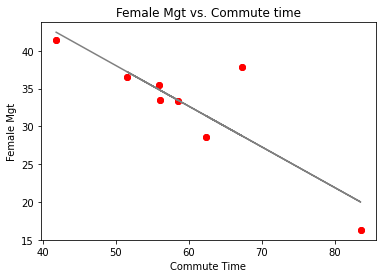

In [284]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "grey")
plt.title("Female Mgt vs. Commute time")
plt.xlabel("Commute Time")
plt.ylabel("Female Mgt")

plt.show()

In [249]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.7391859888473162


In [33]:
f = 'y ~ x'
test = ols(f, data = df_m2).fit()

test.summary()

C:\Users\Kristina\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     17.00
Date:                Mon, 15 Aug 2022   Prob (F-statistic):            0.00619
Time:                        07:36:54   Log-Likelihood:                -21.728
No. Observations:                   8   AIC:                             47.46
Df Residuals:                       6   BIC:                             47.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9673      7.927      8.195      0.000      45.570      84.365
x             -0.5381      0.130     -4.124      0.006      -0.857      -0.219
==============================================================================
Omnibus:                       14.041   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.048
Skew:                           1.705   Prob(JB):                       0.0801
Kurtosis:                       4.874   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Female management & Child Care % portion

In [250]:
df4= pd.read_excel('OECD time dedicated for child care by gender.xlsx', sheet_name='Sheet2')
df4

Country            Gender  No Child per  1 child per  \
0           Mexico  Female/ Male (%)      0.726023     0.738625   
1   United Kingdom  Female/ Male (%)      0.709677     0.702703   
2          Germany  Female/ Male (%)      0.690909     0.708904   
3         Slovenia  Female/ Male (%)      0.574468     0.688034   
4           Poland  Female/ Male (%)      0.606061     0.687075   
5        Lithuania  Female/ Male (%)      0.600000     0.755102   
6          Estonia  Female/ Male (%)      0.619048     0.698113   
7           Sweden  Female/ Male (%)      0.646154     0.665480   
8            Japan  Female/ Male (%)      0.880000     0.823944   
9         Bulgaria  Female/ Male (%)      0.604651     0.728889   
10         Belgium  Female/ Male (%)      0.689655     0.688172   
11          Latvia  Female/ Male (%)      0.660377     0.766355   
12         Austria  Female/ Male (%)      0.708685     0.727714   
13           Spain  Female/ Male (%)      0.721102     0.611774   
14           Italy  Female/ Male (%)      0.695786     0.657526   
15           Korea  Female/ Male (%)      0.858201     0.818866   
16         Finland  Female/ Male (%)      0.776276     0.670848   
17          Norway  Female/ Male (%)      0.679753     0.620223   
18          France  Female/ Male (%)      0.725147     0.641995   
19   United States  Female/ Male (%)      0.678781     0.618995   
20      Canada (e)  Female/ Male (%)      0.676338     0.654568   

    2 children or more per  
0                 0.770258  
1                 0.727273  
2                 0.715962  
3                 0.733154  
4                 0.714674  
5                 0.704918  
6                 0.739003  
7                 0.655172  
8                 0.801932  
9                 0.736842  
10                0.724138  
11                0.786408  
12                0.689564  
13                0.631947  
14                0.684644  
15                0.811339  
16                0.665156  
17                0.618614  
18                0.709218  
19                0.652051  
20                     NaN

In [251]:
# fill previous col
df4=df4. fillna(method='ffill', axis=1)
df4

Country            Gender No Child per 1 child per  \
0           Mexico  Female/ Male (%)     0.726023    0.738625   
1   United Kingdom  Female/ Male (%)     0.709677    0.702703   
2          Germany  Female/ Male (%)     0.690909    0.708904   
3         Slovenia  Female/ Male (%)     0.574468    0.688034   
4           Poland  Female/ Male (%)     0.606061    0.687075   
5        Lithuania  Female/ Male (%)          0.6    0.755102   
6          Estonia  Female/ Male (%)     0.619048    0.698113   
7           Sweden  Female/ Male (%)     0.646154     0.66548   
8            Japan  Female/ Male (%)         0.88    0.823944   
9         Bulgaria  Female/ Male (%)     0.604651    0.728889   
10         Belgium  Female/ Male (%)     0.689655    0.688172   
11          Latvia  Female/ Male (%)     0.660377    0.766355   
12         Austria  Female/ Male (%)     0.708685    0.727714   
13           Spain  Female/ Male (%)     0.721102    0.611774   
14           Italy  Female/ Male (%)     0.695786    0.657526   
15           Korea  Female/ Male (%)     0.858201    0.818866   
16         Finland  Female/ Male (%)     0.776276    0.670848   
17          Norway  Female/ Male (%)     0.679753    0.620223   
18          France  Female/ Male (%)     0.725147    0.641995   
19   United States  Female/ Male (%)     0.678781    0.618995   
20      Canada (e)  Female/ Male (%)     0.676338    0.654568   

   2 children or more per  
0                0.770258  
1                0.727273  
2                0.715962  
3                0.733154  
4                0.714674  
5                0.704918  
6                0.739003  
7                0.655172  
8                0.801932  
9                0.736842  
10               0.724138  
11               0.786408  
12               0.689564  
13               0.631947  
14               0.684644  
15               0.811339  
16               0.665156  
17               0.618614  
18               0.709218  
19               0.652051  
20               0.654568

In [252]:
df_m3=pd.merge(df_m2,df4,on=["Country"])
df_m3

Country  Female Mgt  Unnamed: 0        All   No child  \
0         Austria        35.5           9  55.925980  55.135693   
1         Austria        35.5           9  55.925980  55.135693   
2         Finland        36.5          11  51.595989  53.363808   
3         Finland        36.5          11  51.595989  53.363808   
4          France        37.8          12  67.324043  66.209946   
5          France        37.8          12  67.324043  66.209946   
6           Italy        28.6          13  62.425739  67.161354   
7           Italy        28.6          13  62.425739  67.161354   
8           Korea        16.3          14  83.568405  85.139854   
9           Korea        16.3          14  83.568405  85.139854   
10         Norway        33.5          15  56.146370  56.745258   
11         Norway        33.5          15  56.146370  56.745258   
12          Spain        33.3          16  58.488918  63.010670   
13          Spain        33.3          16  58.488918  63.010670   
14  United States        41.4          17  41.843765  45.757935   
15  United States        41.4          17  41.843765  45.757935   

    with children under school age  with school-aged children Abbrev Gender_x  \
0                        51.087162                  59.210167    AUT     Male   
1                        51.087162                  59.210167    AUT   Female   
2                        47.071213                  48.122997    FIN     Male   
3                        47.071213                  48.122997    FIN   Female   
4                        66.210907                  69.595276    FRA     Male   
5                        66.210907                  69.595276    FRA   Female   
6                        49.630707                  53.430584    ITA     Male   
7                        49.630707                  53.430584    ITA   Female   
8                        72.036217                  73.656166    KOR     Male   
9                        72.036217                  73.656166    KOR   Female   
10                       61.036919                  51.474747    NOR     Male   
11                       61.036919                  51.474747    NOR   Female   
12                       53.835121                  50.398800    ESP     Male   
13                       53.835121                  50.398800    ESP   Female   
14                       33.575378                  39.111542    USA     Male   
15                       33.575378                  39.111542    USA   Female   

    No Child    1 child 2 children or more          Gender_y No Child per  \
0   0.902647   4.263226           7.937623  Female/ Male (%)     0.708685   
1   2.195876  11.393941           17.63166  Female/ Male (%)     0.708685   
2   0.281768   5.268097           6.511882  Female/ Male (%)     0.776276   
3   0.977674  10.736967          12.935622  Female/ Male (%)     0.776276   
4   0.682192   4.352125            5.18233  Female/ Male (%)     0.725147   
5   1.799833   7.804482          12.639736  Female/ Male (%)     0.725147   
6   0.619813   4.977224           6.592999  Female/ Male (%)     0.695786   
7   1.417609   9.555919          14.313518  Female/ Male (%)     0.695786   
8   0.597615   2.756274           3.046897  Female/ Male (%)     0.858201   
9   3.616903  12.460469          13.103244  Female/ Male (%)     0.858201   
10  1.018501   5.622647           7.970558  Female/ Male (%)     0.679753   
11  2.161862   9.182473          12.928373  Female/ Male (%)     0.679753   
12  0.866988   6.254856           8.943748  Female/ Male (%)     0.721102   
13  2.241635   9.856505          15.356384  Female/ Male (%)     0.721102   
14  0.980638   5.563492           6.457606  Female/ Male (%)     0.678781   
15  2.072224   9.038654          12.101433  Female/ Male (%)     0.678781   

   1 child per 2 children or more per  
0     0.727714               0.689564  
1     0.727714               0.689564  
2     0.670848               0.665156  
3     0.670848        

In [272]:
# choose your variables
x = df_m3["1 child per"].values.reshape(-1, 1) 
y = df_m3["Female Mgt"].values.reshape(-1, 1)  

In [273]:
# run linear regression
lr = LinearRegression()

In [274]:
# fit the model 
lr.fit(x,y)

LinearRegression()

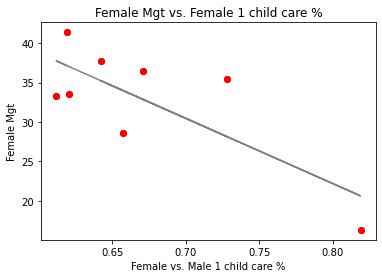

In [275]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "grey")
plt.title("Female Mgt vs. Female 1 child care %")
plt.xlabel("Female vs. Male 1 child care %")
plt.ylabel("Female Mgt")

plt.show()

In [257]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.582239008433807


In [276]:
# choose your variables
x = df_m3["No Child per"].values.reshape(-1, 1) 
y = df_m3["Female Mgt"].values.reshape(-1, 1)  

In [277]:
# run linear regression
lr = LinearRegression()

In [278]:
# fit the model 
lr.fit(x,y)

LinearRegression()

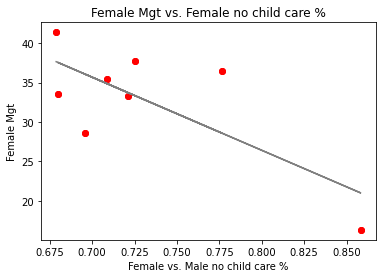

In [280]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "grey")
plt.title("Female Mgt vs. Female no child care %")
plt.xlabel("Female vs. Male no child care %")
plt.ylabel("Female Mgt")

plt.show()

In [262]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.5341994898634892


In [263]:
df5= pd.read_excel('Korea STEM Education_Employment_ combined.xlsx', sheet_name='STEM_2')
df5

Year Graduates/ Employees       Broad Field  Student Total  \
0  2018.0            Graduates       Engineering       149571.0   
1  2019.0            Graduates       Engineering       150766.0   
2  2020.0            Graduates       Engineering       156539.0   
3  2018.0            Graduates  Natural Sciences        62960.0   
4  2019.0            Graduates  Natural Sciences        62201.0   
5  2020.0            Graduates  Natural Sciences        62988.0   
6     NaN                  NaN               NaN            NaN   
7     NaN                  NaN              1000            NaN   

   Student Female  Student Total.1  Student Female.1  Employee Total  \
0         28090.0          149.571            28.090           837.0   
1         29223.0          150.766            29.223           861.0   
2         31004.0          156.539            31.004           847.0   
3         33315.0           62.960            33.315          1096.0   
4         32457.0           62.201            32.457          1157.0   
5         33050.0           62.988            33.050          1164.0   
6             NaN              NaN               NaN             NaN   
7             NaN              NaN               NaN             NaN   

   Employee Female   
0             250.0  
1             252.0  
2             283.0  
3             380.0  
4             407.0  
5             410.0  
6               NaN  
7               NaN

In [264]:
# Remove 2 columns as index base
df5.drop([6, 7], axis=0, inplace=True)
df5

Year Graduates/ Employees       Broad Field  Student Total  \
0  2018.0            Graduates       Engineering       149571.0   
1  2019.0            Graduates       Engineering       150766.0   
2  2020.0            Graduates       Engineering       156539.0   
3  2018.0            Graduates  Natural Sciences        62960.0   
4  2019.0            Graduates  Natural Sciences        62201.0   
5  2020.0            Graduates  Natural Sciences        62988.0   

   Student Female  Student Total.1  Student Female.1  Employee Total  \
0         28090.0          149.571            28.090           837.0   
1         29223.0          150.766            29.223           861.0   
2         31004.0          156.539            31.004           847.0   
3         33315.0           62.960            33.315          1096.0   
4         32457.0           62.201            32.457          1157.0   
5         33050.0           62.988            33.050          1164.0   

   Employee Female   
0             250.0  
1             252.0  
2             283.0  
3             380.0  
4             407.0  
5             410.0

In [265]:
# choose your variables
x = df5["Student Female.1"].values.reshape(-1, 1) 
y = df5["Employee Female "].values.reshape(-1, 1)

In [266]:
# run linear regression
lr = LinearRegression()

In [267]:
# fit the model 
lr.fit(x,y)

LinearRegression()

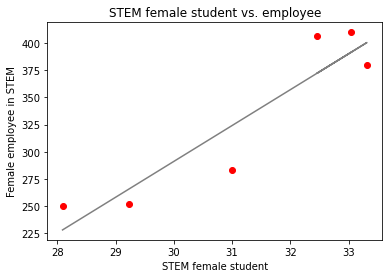

In [270]:
# Visualization
plt.scatter(x, y, color = "red")
plt.plot(x, lr.predict(x), color = "grey")
plt.title("STEM female student vs. employee")
plt.xlabel("STEM female student")
plt.ylabel("Female employee in STEM")

plt.show()

In [271]:
# Print R-squared value of the test data.
print(lr.score(x,y)) 

0.8534079593430184


## Appendix

<AxesSubplot:xlabel='Period'>

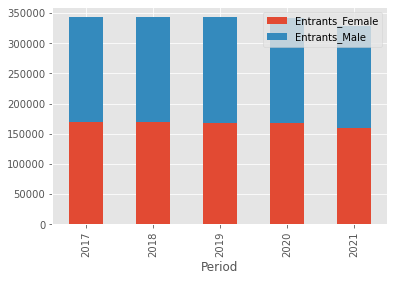

In [40]:
# stacked bar graph

plt.style.use('ggplot')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
table_ent= table1[['Entrants_Female','Entrants_Male']]
table_ent.plot(kind='bar', stacked=True)


<AxesSubplot:xlabel='Period'>

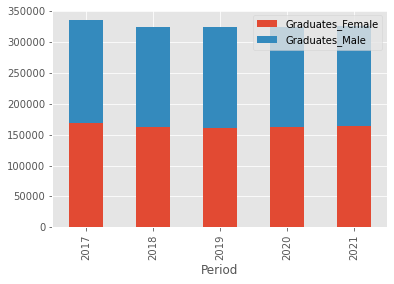

In [41]:
# stacked bar graph

plt.style.use('ggplot')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
table_grad= table1[['Graduates_Female','Graduates_Male']]
table_grad.plot(kind='bar', stacked=True)

Text(0, 0.5, '% ')

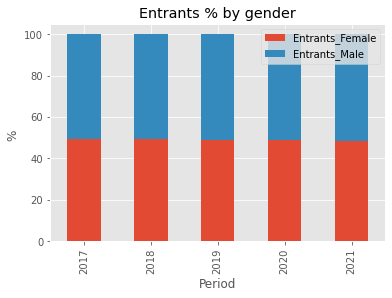

In [44]:
stacked_data = table_ent.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Entrants % by gender")
plt.xlabel("Period")
plt.ylabel("% ")

Text(0, 0.5, '% ')

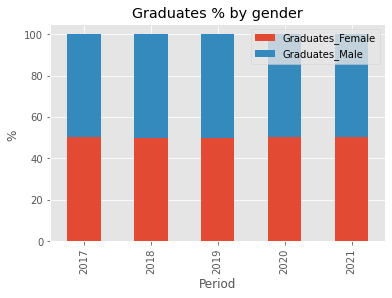

In [46]:
stacked_data = table_grad.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Graduates % by gender")
plt.xlabel("Period")
plt.ylabel("% ")